# Making the data visual

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import src.cleaning_utils as cu
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster

## Download our Airbnb and enriching datasets

In [58]:
# Airbnb
Abb_NY = pd.read_csv("output/Abb_NY_clean_output.csv",encoding = "ISO-8859-1")
Abb_NY.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,year
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019.0
2,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019.0
3,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018.0
4,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019.0


In [97]:
# Monuments
monuments_NY = pd.read_csv("output/data_NYmonuments_output.csv",encoding = "ISO-8859-1")
monuments_NY.head()

,Monument,Borough,Location
0,69th Regiment Armory,Manhattan,40Â°44â²30â³N 73Â°59â²01â³Wï»¿ / ï»¿40.741...
1,Admiral David Glasgow Farragut Gravesite,Bronx,40Â°53â²32â³N 73Â°51â²57â³Wï»¿ / ï»¿40.892...
2,African Burial Ground,Manhattan,40Â°42â²52â³N 74Â°00â²16â³Wï»¿ / ï»¿40.714...
3,Ambrose (lightship),Manhattan,40Â°42â²17â³N 74Â°00â²09â³Wï»¿ / ï»¿40.704...
4,American Stock Exchange,Manhattan,40Â°42â²32â³N 74Â°00â²45â³Wï»¿ / ï»¿40.709...


In [96]:
#Restaurants
restaurants_NY = pd.read_csv("output/data_NYrestaurants_output.csv",encoding = "ISO-8859-1")
restaurants_NY.head()

,restaurant_name,borough,street,longitude,latitude
0,Pomp and Circumstance Hospitality,Brooklyn,Lorimer Street,-73.949416,40.714264
1,Charm Kao,Brooklyn,Schermerhorn St.,-73.986352,40.689107
2,SAKE BAR HAGI 46,Manhattan,W. 46TH STREET,-73.989528,40.760463
3,Yum yum too,Manhattan,9ave,-73.990683,40.761081
4,Xochil Pizza Corp,Brooklyn,5th Avenue,-74.008216,40.647140


### Which type os plot is better for showing our information?

In [93]:
Abb_NY["neighbourhood_group"].value_counts(dropna=False)

Manhattan        15834
Brooklyn         15702
Queens            4457
Bronx              869
Staten Island      309
Name: neighbourhood_group, dtype: int64

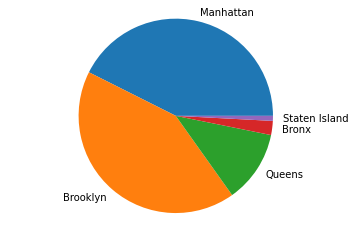

In [95]:
# In my opinion, pie chart is not a clean as clear option
labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx','Staten Island' ]
sizes = [15834, 15702, 4457, 869,309]

plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()

Text(0.5, 0, 'Neighbourhood')

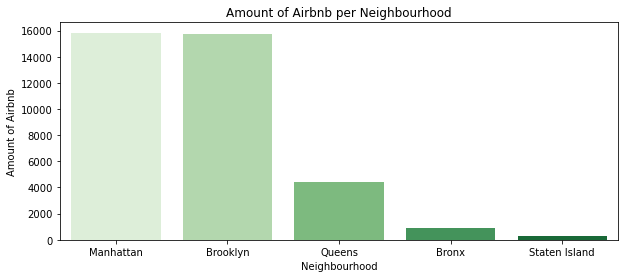

In [84]:
# Bar chart instead, is a great option
plt.figure(figsize=(10,4))
Airbnb_plot = sns.countplot(x=Abb_NY.neighbourhood_group, palette= "Greens", order=["Manhattan","Brooklyn","Queens","Bronx","Staten Island"])
Airbnb_plot.set_title("Amount of Airbnb per Neighbourhood")
Airbnb_plot.set_ylabel("Amount of Airbnb")
Airbnb_plot.set_xlabel("Neighbourhood")

We can see how Manhattan and Brooklym are the two Neighbourhood with more airbnb reservations. What is the reason of that?
- More number of monuments?

In [117]:
#Export the plot
Airbnb_plot.figure.savefig("output/Airbnb_plot.jpg", dpi=100)

Text(0.5, 0, 'Neighbourhood')

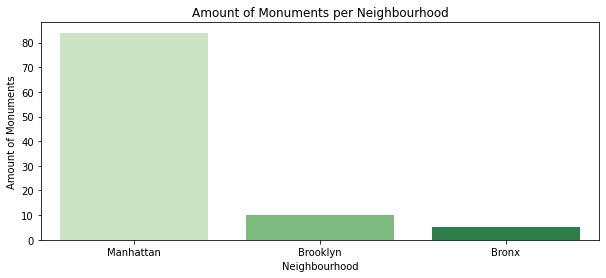

In [86]:
# This idea really fits with the amount of arbnb in Manhattan but, what about Brooklyn? Maybe price?
plt.figure(figsize=(10,4))
Monuments_plot = sns.countplot(x=monuments_NY.Borough, palette= "Greens", order=["Manhattan","Brooklyn","Bronx"])
Monuments_plot.set_title("Amount of Monuments per Neighbourhood")
Monuments_plot.set_ylabel("Amount of Monuments")
Monuments_plot.set_xlabel("Neighbourhood")

In [118]:
#Export the plot
Monuments_plot.figure.savefig("output/Monuments_plot.jpg", dpi=100)

In [65]:
# We make mean groups of prices by neighbourhood and make it visual.
df_median=Abb_NY.groupby("neighbourhood_group").median()
df_median["Name"] = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
df_median = df_median.sort_values(by=["price"], ascending=False)
drop_cols = ["latitude","longitude","minimum_nights","number_of_reviews","year"]
df_median = df_median.drop(drop_cols, axis =1)
df_median


,price,Name
neighbourhood_group,,
Manhattan,140,Manhattan
Brooklyn,93,Brooklyn
Queens,72,Queens
Staten Island,72,Staten Island
Bronx,64,Bronx


<AxesSubplot:xlabel='Name', ylabel='price'>

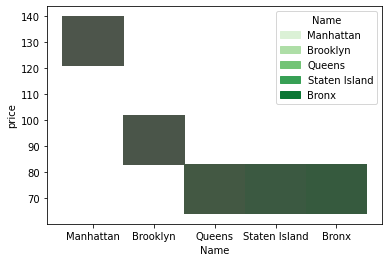

In [120]:
x_order = ["Manhattan","Brooklyn","Queens","Staten Island","Bronx"]
median_plot= sns.histplot(x=df_median.Name, y=df_median.price, hue=df_median.Name,  palette= "Greens", hue_order=["Manhattan","Brooklyn","Queens","Staten Island","Bronx"] )
median_plot

In [122]:
median_plot.figure.savefig("output/median_plot.jpg", dpi=100)

After this first step analysis, we can conclude that there are two good neighbourhood where having a house for ranting would be a great idea.
- Manhattan: Where most monuments and offices are
- Brooklyn: is "near" to Manhattan but cheaper.

Text(0.5, 0, 'Neighbourhood')

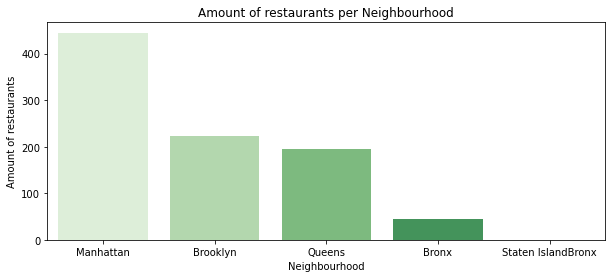

In [87]:
# And what about restourants? where would be the best place for having locals destinated for a future restaurant?
plt.figure(figsize=(10,4))
restaurants_plot = sns.countplot(x=restaurants_NY.borough, palette= "Greens", order=["Manhattan","Brooklyn","Queens","Bronx","Staten Island""Bronx"])
restaurants_plot.set_title("Amount of restaurants per Neighbourhood")
restaurants_plot.set_ylabel("Amount of restaurants")
restaurants_plot.set_xlabel("Neighbourhood")

In [123]:
restaurants_plot.figure.savefig("output/restaurants_plot.jpg", dpi=100)

As it was to imagine, Manhattan and Brooklyn are the two where more restaurant are. As more trafic of people, more offer of restaurants.

In [134]:
#What about seen this datas on a map? I,m sure it will help.
Manhattan_lat = 40.78343
Manhattan_long = -73.96625
brooklyn_lat = 40.6501
brooklyn_long = -73.94958

In [135]:
# We make a map focus on Manhattan
map_1 = folium.Map(location = [Manhattan_lat,Manhattan_long ], zoom_start= 11.4)
map_1

In [136]:
# We define with a dollar Manhattan because is where more expensive reservations are and Brooklyn with a house 
# because it a more residential area.
icono1 = Icon( color= "green",
             prefix = "fa",
             icon = "dollar", 
             icon_color = "black"

)

loc = { "location": [Manhattan_lat, Manhattan_long], 
       "tooltip": "Manhattan" }

In [137]:
marker_manh = Marker(**loc, icon=icono1)

In [138]:
marker_manh.add_to(map_1)

In [139]:
icono2 = Icon( color= "green",
             prefix = "fa",
             icon = "home", 
             icon_color = "black"

)

loc = { "location": [brooklyn_lat, brooklyn_long], 
       "tooltip": "Brooklyn" }

In [140]:
marker_brook = Marker(**loc, icon=icono2)

In [141]:
marker_brook.add_to(map_1)
map_1

In [142]:
#And, wont it be great to also see a heat map of restaurants to have all on a same map?
restaurants_NY = pd.read_csv("output/data_NYrestaurants_output.csv",encoding = "ISO-8859-1")
restaurants_NY.head()

,restaurant_name,borough,street,longitude,latitude
0,Pomp and Circumstance Hospitality,Brooklyn,Lorimer Street,-73.949416,40.714264
1,Charm Kao,Brooklyn,Schermerhorn St.,-73.986352,40.689107
2,SAKE BAR HAGI 46,Manhattan,W. 46TH STREET,-73.989528,40.760463
3,Yum yum too,Manhattan,9ave,-73.990683,40.761081
4,Xochil Pizza Corp,Brooklyn,5th Avenue,-74.008216,40.647140


In [143]:
restaurants = folium.FeatureGroup(name = "restaurants_NY")
HeatMap(data = restaurants_NY [["latitude","longitude"]], radius=15).add_to(restaurants)
morning_group.add_to(map_1)

In [144]:
map_1

In [133]:
map_1.save("output/map_1.jpg", dpi=100)